In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

seaLevel = pd.read_csv('SeaLevel.csv')
seaLevel

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,2014,NaN,NaN,NaN,8.663700
1,2013,8.980315,8.622047,9.338583,8.546648
2,2012,9.326772,8.992126,9.661417,8.457058
3,2011,8.964567,8.661417,9.267717,8.053065
4,2010,8.901575,8.618110,9.185039,8.122973
...,...,...,...,...,...
130,1884,0.590551,-0.283465,1.464567,NaN
131,1883,-0.232283,-1.129921,0.665354,NaN
132,1882,-0.440945,-1.346457,0.464567,NaN
133,1881,0.220472,-0.732283,1.173228,NaN


In [27]:
seaLevel = seaLevel.rename(columns = {'CSIRO Adjusted Sea Level': 'Sea_Level'})
seaLevel = seaLevel[seaLevel['Year'] < 2014]
seaLevel = seaLevel.sort_values(by = 'Year')
seaLevel = seaLevel.reset_index(drop = True)
seaLevel

,Year,Sea_Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


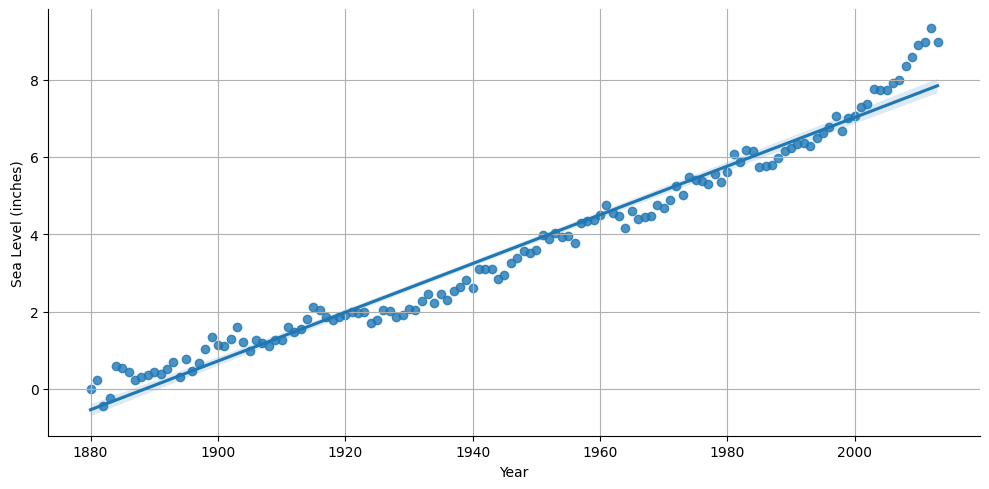

In [28]:
sns.lmplot(x = 'Year', y = 'Sea_Level', data = seaLevel, aspect = 2)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.grid()

In [29]:
from scipy import stats

x = seaLevel.Year
y = seaLevel.Sea_Level

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(f'y = {slope}x + {intercept}')
print(f'r = {r}')
print(f'r^2 = {r**2}')
print(f'p = {p}')
print(f'std_err = {std_err}')

y = 0.0630445840121348x + -119.06594196773978
r = 0.984757131182585
r^2 = 0.969746607414955
p = 3.7886969791131554e-102
std_err = 0.000969211871328715


In [30]:
from sklearn.linear_model import LinearRegression

# We need x and y as numpy arrays
x = seaLevel.Year.values
y = seaLevel.Sea_Level.values

# And we need the numpy arrays to be 2-dimensional
# The -1 works for any length
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

print('slope:', model.coef_)
print('intercept:', model.intercept_)

r_sq = model.score(x, y)
print('coefficient of determination: {:.2%}'.format(r_sq))



slope: [[0.06304458]]
intercept: [-119.06594197]
coefficient of determination: 96.97%


In [31]:
y = slope * 2050 + intercept
y

np.float64(10.175455257136548)

In [33]:
year = 2050
scikit_pred = model.predict([[year]])

scikit_pred[0][0]

np.float64(10.175455257136548)